**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: Luis Angel Hernández Miranda
*   MATRÍCULA: A01797951

En esta actividad trabajarás con el archivo `heart_disease.csv`, basado en un conjunto de datos sobre pacientes y variables clínicas relacionadas con enfermedades cardíacas, disponible en Kaggle.

Los datos fueron recopilados para analizar la presencia de enfermedades cardíacas en los pacientes y contienen información demográfica, clínica y resultados de pruebas diagnósticas. Los indicadores incluidos son:

* `id`: Identificador único de cada paciente
* `age`: Edad del paciente en años
* `origin`: Lugar de estudio
* `sex`: Masculino / Femenino
* `cp`: Tipo de dolor torácico (angina típica, angina atípica, no anginal, asintomático)
* `trestbps`: Presión arterial en reposo (en mm Hg al ingreso al hospital)
* `chol`: Colesterol sérico en mg/dl
* `fbs`: Si el azúcar en ayunas > 120 mg/dl
* `restecg`: Resultados del electrocardiograma en reposo (normal, anomalía ST-T, hipertrofia ventricular izquierda)
* `thalach`: Frecuencia cardíaca máxima alcanzada
* `exang`: Angina inducida por ejercicio (Verdadero / Falso)
* `oldpeak`: Depresión del segmento ST inducida por ejercicio respecto al reposo
* `slope`: Pendiente del segmento ST en el pico de ejercicio
* `ca`: Número de vasos principales coloreados por fluoroscopía (0 - 3)
* `thal`: Resultado de la prueba de perfusión cardíaca (normal, defecto fijo, defecto reversible)
* `num`: Indica si el paciente tiene o no enfermedad cardíaca, o el grado de enfermedad (0 = sano, 1 - 4 = enfermedad) Es la variable de salida o *target*, es decir, la que se pretende predecir más adelante al construir el modelo.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer

1. Descarga el archivo: `heart_disease.csv` y guarda, en un dataframe (`cardio_df`), todos sus registros.
* Haz que la columna `id` sea el índice del dataframe.
* Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas de texto?
* Determina la cantidad de valores únicos por columna.

In [1]:
import pandas as pd
df = pd.read_csv('heart_disease.csv', index_col='id')
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    object 
 2   origin    918 non-null    object 
 3   cp        918 non-null    object 
 4   trestbps  859 non-null    float64
 5   chol      888 non-null    float64
 6   fbs       829 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    863 non-null    float64
 9   exang     863 non-null    object 
 10  oldpeak   856 non-null    float64
 11  slope     610 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       918 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 114.8+ KB


age          50
sex           2
origin        4
cp            4
trestbps     60
chol        216
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

2. Examina las variables numéricas que presentan pocos valores únicos, ya que esto puede indicar que en realidad se tratan de variables categóricas codificadas como números.
* Si existen casos de este tipo, conviértelas a categóricas. Antes de hacerlo, revisa sus descripciones para determinar si son ordinales o nominales y, si son ordinales, establece el orden correcto de las categorías.

In [2]:
df.head()

df['ca'] = pd.Categorical(df['ca'],
                                 categories=[0, 1, 2, 3],
                                 ordered=True)


df['num'] = pd.Categorical(df['num'],
                                  categories=[0, 1, 2, 3, 4],
                                  ordered=True)

df.dtypes

age            int64
sex           object
origin        object
cp            object
trestbps     float64
chol         float64
fbs           object
restecg       object
thalch       float64
exang         object
oldpeak      float64
slope         object
ca          category
thal          object
num         category
dtype: object

3. Obtén las estadísticas descriptivas de las variables, realizando el análisis por separado para las variables numéricas y las categóricas.
* Para las numéricas, incluye el sesgo y la curtosis.
* Para las categóricas, imprime además las tablas de frecuencia.

In [3]:

num_vars = df.select_dtypes(include=['float64', 'int64'])
cat_vars = df.select_dtypes(include=['object', 'category'])

desc_num = num_vars.describe().T
desc_num['skewness'] = num_vars.skew()
desc_num['kurtosis'] = num_vars.kurtosis()

print(desc_num)
display(cat_vars.describe().T)
for col in cat_vars.columns:
    print(f"\nFrecuencias para {col}:")
    print(cat_vars[col].value_counts(dropna=False))


          count        mean        std   min    25%    50%    75%    max  \
age       918.0   53.530501   9.412783  28.0   47.0   54.0   60.0   77.0   
trestbps  859.0  132.294529  18.535875  80.0  120.0  130.0  140.0  200.0   
chol      888.0  242.189189  53.424806  85.0  216.0  223.0  268.0  603.0   
thalch    863.0  137.528389  25.950226  60.0  120.0  140.0  157.0  202.0   
oldpeak   856.0    0.880607   1.091840  -2.6    0.0    0.5    1.5    6.2   

          skewness  kurtosis  
age      -0.193710 -0.382511  
trestbps  0.630411  0.632992  
chol      1.640672  6.573848  
thalch   -0.209319 -0.483939  
oldpeak   1.037990  1.119834  


,count,unique,top,freq
sex,918,2,Male,724
origin,918,4,Cleveland,304
cp,918,4,asymptomatic,495
fbs,829,2,False,691
restecg,918,3,normal,551
exang,863,2,False,526
slope,610,3,flat,345
ca,309,4,0,181
thal,434,3,normal,196
num,918,5,0,411



Frecuencias para sex:
sex
Male      724
Female    194
Name: count, dtype: int64

Frecuencias para origin:
origin
Cleveland        304
Hungary          292
VA Long Beach    200
Switzerland      122
Name: count, dtype: int64

Frecuencias para cp:
cp
asymptomatic       495
non-anginal        204
atypical angina    174
typical angina      45
Name: count, dtype: int64

Frecuencias para fbs:
fbs
False    691
True     138
NaN       89
Name: count, dtype: int64

Frecuencias para restecg:
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

Frecuencias para exang:
exang
False    526
True     337
NaN       55
Name: count, dtype: int64

Frecuencias para slope:
slope
flat           345
NaN            308
upsloping      202
downsloping     63
Name: count, dtype: int64

Frecuencias para ca:
ca
NaN    609
0      181
1       67
2       41
3       20
Name: count, dtype: int64

Frecuencias para thal:
thal
NaN                  484
normal             

4. Calcula el porcentaje de valores faltantes en cada columna.
* Elimina aquellas columnas cuyo porcentaje de valores faltantes supere el 30%.
* Crea un mapa de calor que visualice la distribución de los valores faltantes en todas las columnas restantes.
* Algunas variables presentan valores faltantes de manera simultánea; es decir, en el mapa se pueden identificar filas donde varias están ausentes al mismo tiempo. Enumera cuáles son dichas variables e investiga si esta concurrencia tiene sentido desde un punto de vista médico o clínico.

=== Porcentaje de valores faltantes por columna ===
ca          66.339869
thal        52.723312
slope       33.551198
fbs          9.694989
oldpeak      6.753813
trestbps     6.427015
thalch       5.991285
exang        5.991285
chol         3.267974
age          0.000000
sex          0.000000
origin       0.000000
cp           0.000000
restecg      0.000000
num          0.000000
dtype: float64

Columnas eliminadas (>30% faltantes): ['slope', 'ca', 'thal']


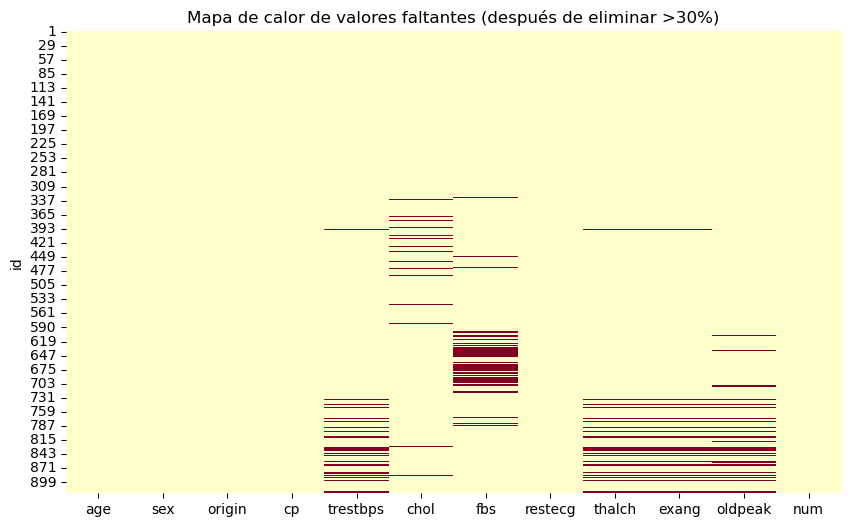


Columnas con valores faltantes restantes: ['trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak']

Distribución del número de columnas faltantes por fila:
0    740
1    119
2      3
3      2
4     51
5      3
Name: count, dtype: int64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el porcentaje de valores faltantes en cada columna
missing_percent = df.isnull().mean() * 100
print("=== Porcentaje de valores faltantes por columna ===")
print(missing_percent.sort_values(ascending=False))

# Eliminar las columnas con más del 30% de valores faltantes
cols_to_drop = missing_percent[missing_percent > 30].index
print("\nColumnas eliminadas (>30% faltantes):", list(cols_to_drop))
df = df.drop(columns=cols_to_drop)

# Visualizar los valores faltantes con un mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='YlOrRd')
plt.title("Mapa de calor de valores faltantes (después de eliminar >30%)")
plt.show()

# Identificar las columnas que aún tienen valores faltantes
remaining_missing = df.columns[df.isnull().any()]
print("\nColumnas con valores faltantes restantes:", list(remaining_missing))

# Verificar si existen filas con varias columnas faltantes al mismo tiempo
missing_rows = df[remaining_missing].isnull().sum(axis=1)
print("\nDistribución del número de columnas faltantes por fila:")
print(missing_rows.value_counts().sort_index())

5. Si centramos el análisis en una de las variables identificadas en el ejercicio anterior, se puede suponer que los hallazgos obtenidos podrían ser aplicables a las demás variables que presentan un patrón similar.

* ¿Tendrán los valores faltantes de `thalch` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
  *   Numéricas: `age`, `chol`
  *   Categóricas: `restecg`, `cp`

Para ello deberás dividir cada columna en dos grupos: con / sin faltantes en `thalch` y utilizar métodos gráficos y pruebas de hipótesis para ver si hay diferencias significativas.
* Incluye las conclusiones del análisis con los resultados obtenidos.
* Justifica si el mecanismo de faltantes de `thalch` es MCAR (*Missing Completely at Random*) o MAR (*Missing at Random*).

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

In [9]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

In [10]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

Análisis numéricos

Variable: age


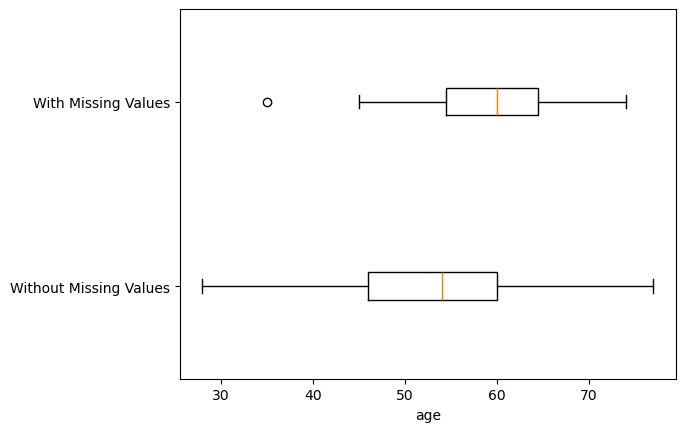

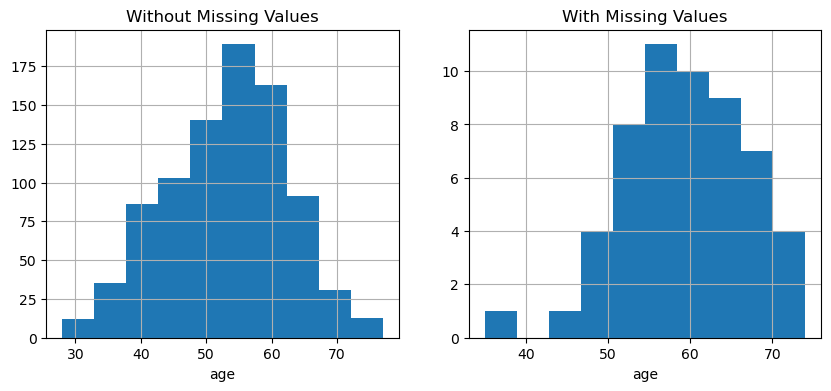

p-value of t-test: 1.5041244185890902e-06

Variable: chol


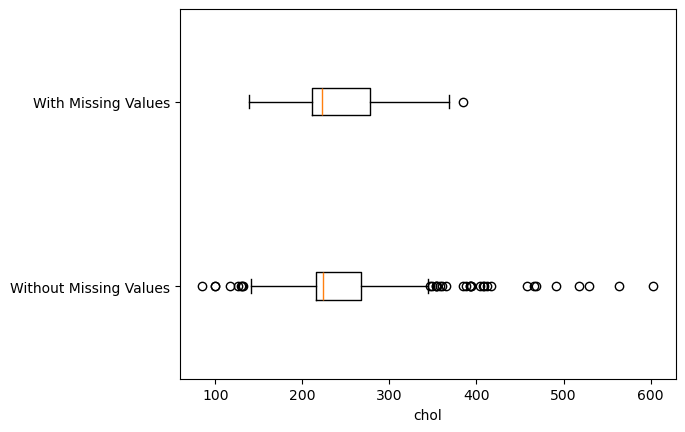

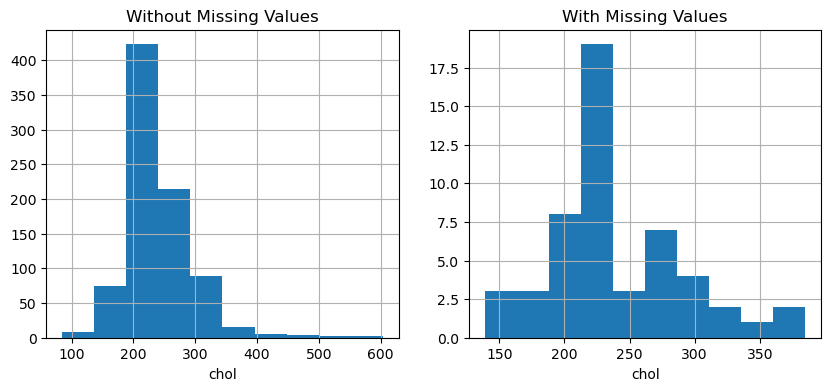

p-value of t-test: 0.7165289974295672
Análisis categóricos

Variable: restecg


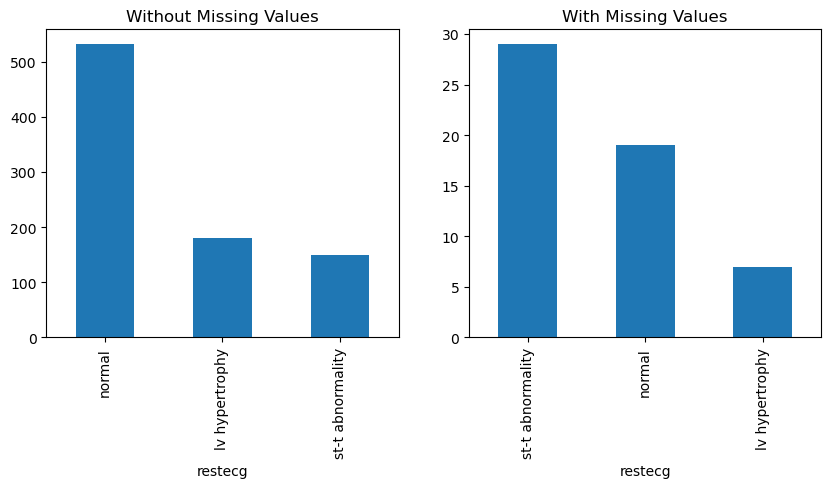

p-value of Chi_squared test: 1.1472889573985467e-09

Variable: cp


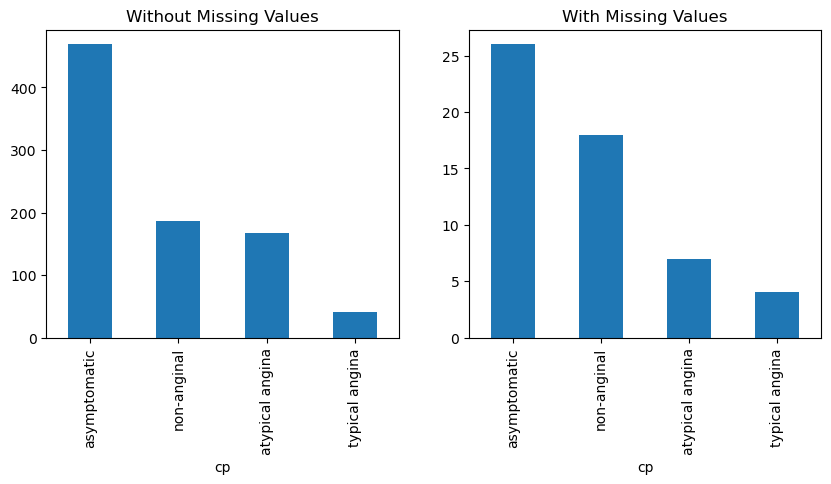

p-value of Chi_squared test: 0.15420097177251701


In [ ]:
BM_MV = df['thalch'].isnull()

print("Análisis numéricos")
for col in ['age', 'chol']:
    print(f"\nVariable: {col}")
    Diagnose_MV_Numerical(df, col, BM_MV)

print("Análisis categóricos")
for col in ['restecg', 'cp']:
    print(f"\nVariable: {col}")
    Diagnose_MV_Categorical(df, col, BM_MV)


"""
 Los valores faltantes de thalch si muestran relación con otras variables del conjunto de datos.
 Al comparar los grupos con y sin valores faltantes, se observó que los pacientes con datos
 ausentes en thalch tienden a ser mayores de edad, con resultados de significancia estadística
 por la prueba t de student (p ≈ 1.5×10⁻⁶). En cambio, el colesterol no mostró diferencias
 significativas (p ≈ 0.71), por lo que no influye en la ausencia de datos.

 En las variables categóricas, el tipo de electrocardiograma en reposo restecg presentó una relación
 estadísticamente significativa (p ≈ 1.1×10⁻⁹). Por tanto, los pacientes con anomalías ST fueron más
 propensos a no tener registrada la frecuencia cardíaca máxima. La variables cp no mostró diferencias
 relevantes.

 Estos resultados indican que los valores faltantes de thalch no son completamente aleatorios. Es
 probable que los ancianos o con alteraciones en el ECG no hayan realizado la prueba de esfuerzo.
 Por ello, el mecanismo de ausencia corresponde a MAR (Missing at Randomn).
"""


6. La imputación de una variable con valores faltantes puede realizarse por grupos o segmentos relevantes. Esto significa que, en lugar de utilizar una estadística global de toda la columna, se calcula la estadística correspondiente dentro de cada grupo definido por otra variable, haciendo:

> `df['var_with_missing'] = df.groupby('related_var')['var_with_missing'].transform(lambda x: x.fillna(x.median()))`

* Utiliza la variable `restecg` para separar los grupos e imputar `thalch` y todas las variables con patrón de faltantes similar (identificadas en el ejercicio 3) Asegúrate de cambiar la función de agregado si hay variables no numéricas.
* Vuelve a generar el mapa de calor para verificar que los valores faltantes en estas variables hayan sido imputados.

Valores faltantes después de la imputación
thalch      0
oldpeak     0
trestbps    0
chol        0
dtype: int64


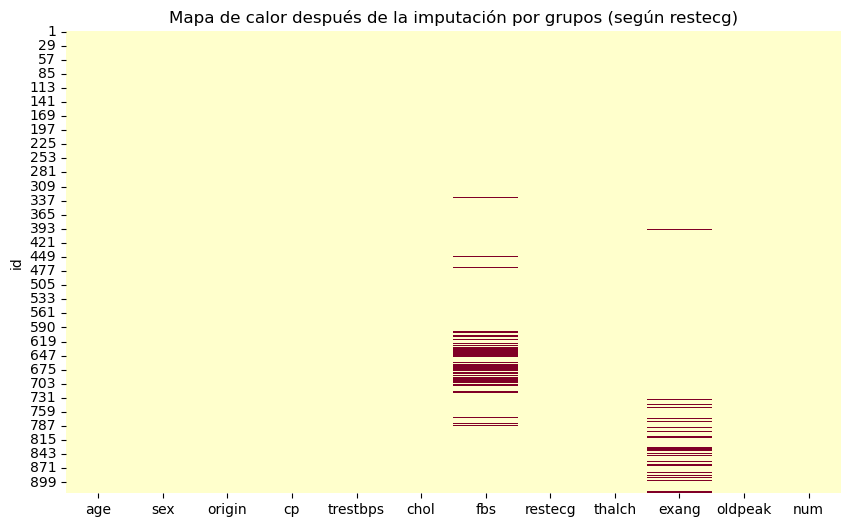

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

vars_to_impute = ['thalch', 'oldpeak', 'trestbps', 'chol']

for col in vars_to_impute:
    df[col] = df.groupby('restecg')[col].transform(lambda x: x.fillna(x.median()))

print("Valores faltantes después de la imputación")
print(df[vars_to_impute].isnull().sum())

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='YlOrRd')
plt.title("Mapa de calor después de la imputación por grupos (según restecg)")
plt.show()

7. Para las variables que aún presentan valores faltantes, realiza la imputación utilizando estadísticas generales calculadas sobre toda la columna, sin segmentar por grupos. Esta vez utiliza la clase `SimpleImputer` de sklearn
* Justifica la estrategia (*mean, median, most_frequent*) que emplees en cada caso.


Columnas con valores faltantes: []

Valores faltantes
Series([], dtype: int64)


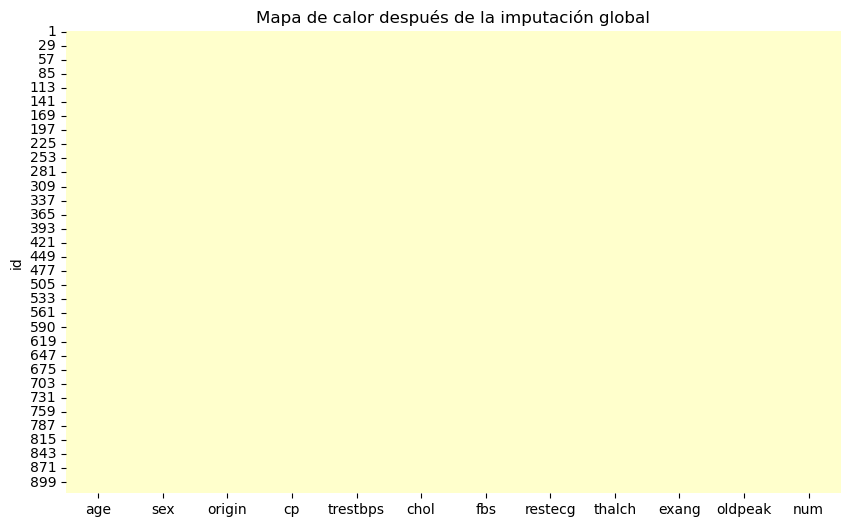

In [ ]:
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

missing_cols = df.columns[df.isnull().any()]
print("Columnas con valores faltantes:", list(missing_cols))
num_vars = df.select_dtypes(include=['float64', 'int64']).columns
cat_vars = df.select_dtypes(include=['object', 'category']).columns


imputer_median = SimpleImputer(strategy='median')
df[num_vars] = imputer_median.fit_transform(df[num_vars])
imputer_mode = SimpleImputer(strategy='most_frequent')
df[cat_vars] = imputer_mode.fit_transform(df[cat_vars])

print("\nValores faltantes")
print(df.isnull().sum()[df.isnull().sum() > 0])

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='YlOrRd')
plt.title("Mapa de calor después de la imputación global")
plt.show()


"""
Usé mediana para variables numéricas porque es resistente a valores extremos
y conserva la tendencia central real.
Para variables categóricas empleé most_frequent (moda) ya que mantiene las 
categorías existentes sin alterar su distribución.
"""

8. Dibuja boxplots de todas las variables numéricas.
* Obtén los valores atípicos mediante el método gráfico, a partir del objeto devuelto por el boxplot.

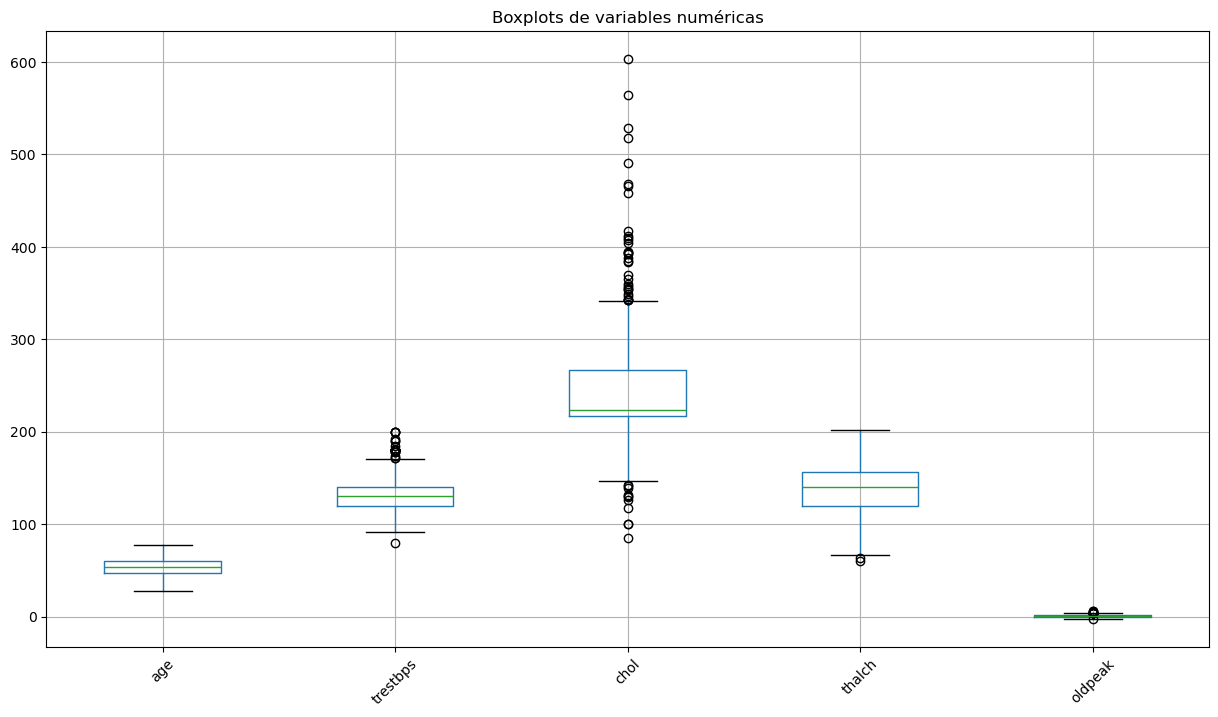

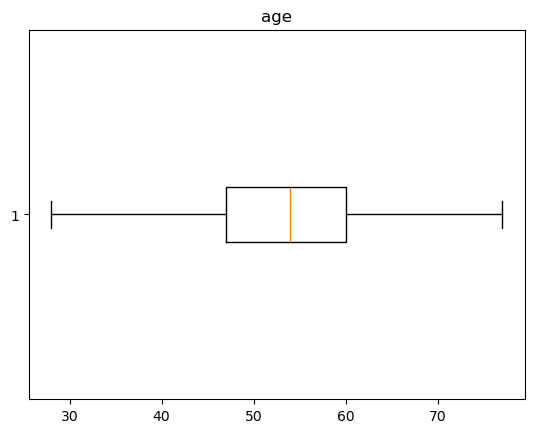

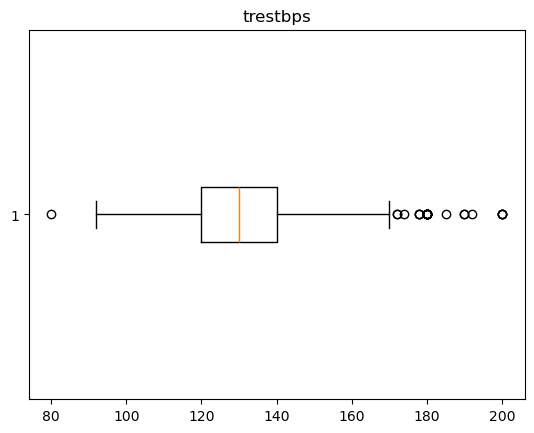

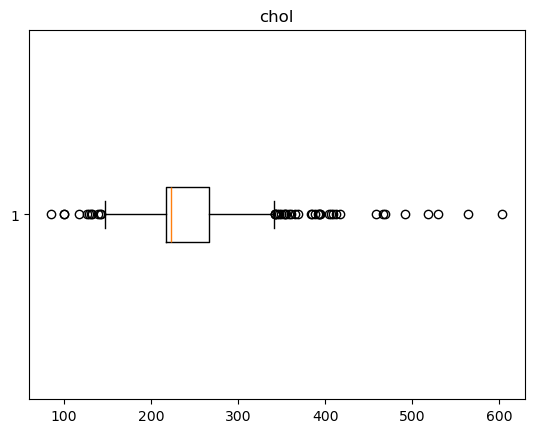

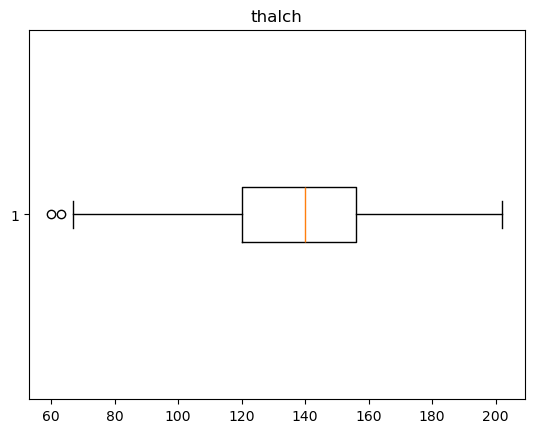

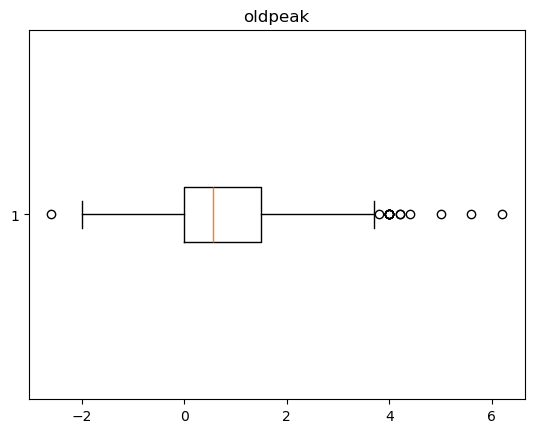

age: [array([], dtype=float64)]
trestbps: [array([ 80., 172., 180., 200., 174., 178., 192., 180., 178., 180., 190.,
       180., 180., 180., 180., 200., 180., 180., 180., 200., 185., 200.,
       180., 178., 172., 180., 190.])]
chol: [array([141., 126., 131., 132., 129., 100.,  85., 117., 100., 142., 139.,
       354., 353., 417., 360., 407., 564., 394., 409., 342., 358., 412.,
       468., 365., 344., 394., 347., 466., 529., 392., 355., 603., 342.,
       404., 518., 388., 491., 342., 393., 458., 384., 349., 369., 385.])]
thalch: [array([60., 63.])]
oldpeak: [array([-2.6,  6.2,  4. ,  5.6,  4. ,  4.2,  4.2,  3.8,  4.4,  4. ,  4. ,
        5. ,  4. ,  4. ,  4. ,  4. ])]


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

num_vars = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15,8))
df[num_vars].boxplot(rot=45)
plt.title("Boxplots de variables numéricas")
plt.show()

outliers = {}
for col in num_vars:
    fig = plt.figure()
    box = plt.boxplot(df[col].dropna(), vert=False)
    plt.title(col)
    plt.show()
    outliers[col] = [item.get_xdata() for item in box['fliers']]

for k, v in outliers.items():
    print(f"{k}: {v}")


9. Para la variable `trestbps`, calcula los valores atípicos utilizando el método del rango intercuartílico (IQR).
* Para ello obtén los cuartiles necesarios y determina los límites superior e inferior para filtrar los valores que se encuentren fuera de ese rango.
* Verifica si los resultados coinciden con los obtenidos en el ejercicio anterior.

Valores atípicos detectados en trestbps (método IQR):
id
15     172.0
84     180.0
127    200.0
173    174.0
184    178.0
189    192.0
202    180.0
214    178.0
232    180.0
339    190.0
376    180.0
388    180.0
476    180.0
485    180.0
549    200.0
570    180.0
596    180.0
645     80.0
648    180.0
681    200.0
701    185.0
702    200.0
728    180.0
780    178.0
855    172.0
890    180.0
897    190.0
Name: trestbps, dtype: float64


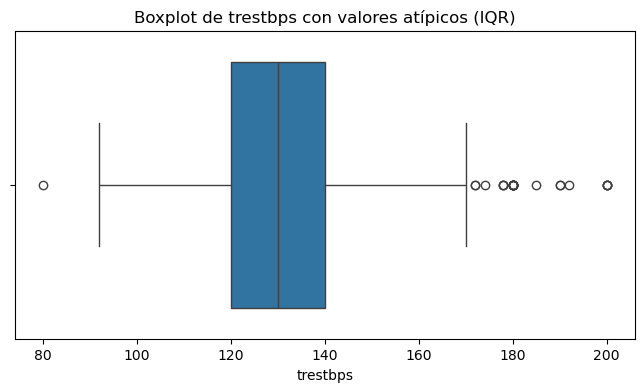

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_iqr = df[(df['trestbps'] < lim_inf) | (df['trestbps'] > lim_sup)]
print("Valores atípicos detectados en trestbps (método IQR):")
print(outliers_iqr['trestbps'])

plt.figure(figsize=(8,4))
sns.boxplot(x=df['trestbps'])
plt.title("Boxplot de trestbps con valores atípicos (IQR)")
plt.show()


10. Elimina los valores atípicos identificados de la variable `trestbps`.
* Dibuja el boxplot final para visualizar la distribución depurada.

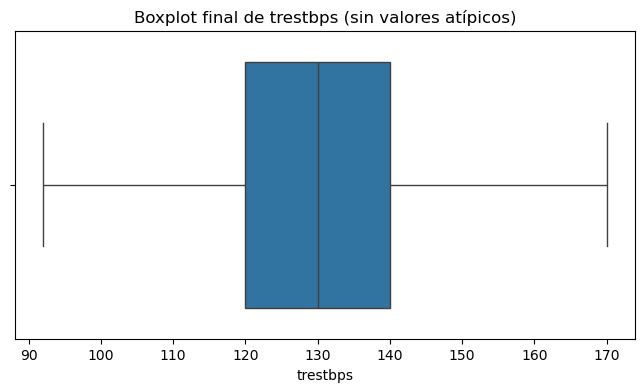

In [20]:
df = df[(df['trestbps'] >= lim_inf) & (df['trestbps'] <= lim_sup)]

plt.figure(figsize=(8,4))
sns.boxplot(x=df['trestbps'])
plt.title("Boxplot final de trestbps (sin valores atípicos)")
plt.show()
